# Working with Images & Logistic Regression in PyTorch

### Part 3 of "Deep Learning with Pytorch: Zero to GANs"
This tutorial covers the following topics:
    
* Working with images in PyTorch (using the MNIST dataset)
* Splitting a dataset into training, validation, and test sets
* Creating PyTorch models with custom logic by extending the `nn.Module` class
* Interpreting model outputs as probabilities using Softmax and picking predicted labels
* Picking a useful evaluation metric (accuracy) and loss function (cross-entropy) for classification problems
* Setting up a training loop that also evaluates the model using the validation set
* Testing the model manually on randomly picked examples 
* Saving and loading model checkpoints to avoid retraining from scratch

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [5]:
# Download dataset
dataset = MNIST(root='data_MNIST/', download=True)

100.1%Extracting data_MNIST/MNIST/raw/train-images-idx3-ubyte.gz to data_MNIST/MNIST/raw
113.5%Extracting data_MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to data_MNIST/MNIST/raw
100.4%Extracting data_MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to data_MNIST/MNIST/raw
180.4%Extracting data_MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to data_MNIST/MNIST/raw
Processing...
Done!


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

single data object:  (<PIL.Image.Image image mode=L size=28x28 at 0x7FD148B334F0>, 5)
Label: 5


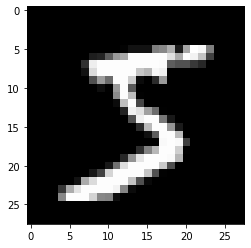

In [12]:
# Visualizing out data
print("single data object: ", dataset[0])

# print the object as a picture (matplotlib graph)
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [13]:
import torchvision.transforms as transforms

In [24]:
# Splitting Dataset
# some information about the dataset
print("the size of the dataset: {}, type: {}".format(len(dataset), type(dataset)))

# split a part of the dataset to be a test dataset (for model evaluation in the end)
test_dataset = MNIST(root='data_MNIST/', train=False)
print("the size of the test dataset: {}, type: {}".format(len(test_dataset), type(test_dataset)))

# transform the data in dataset [from PIL.Image] into tensor form
dataset = MNIST(root='data_MNIST/', train=True, transform=transforms.ToTensor())
img_tensor, label = dataset[0]
print("the shape of transformed training object: ", img_tensor.shape)

the size of the dataset: 60000, type: <class 'torchvision.datasets.mnist.MNIST'>
the size of the test dataset: 10000, type: <class 'torchvision.datasets.mnist.MNIST'>
the shape of transformed training object:  torch.Size([1, 28, 28])


tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


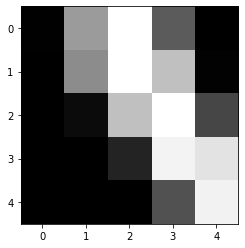

In [27]:
# Understanding & Visualizing a Tensor
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [31]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader


In [32]:
# Preparing Data For The Model
# training and talidating sets
train_ds, val_ds = random_split(dataset, [50000, 10000])
print("size of the training set: {}, size of the validation set: {}".format(len(train_ds), len(val_ds)))

# dataloader
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

size of the training set: 50000, size of the validation set: 10000
